## Analysis: population estimates for 2018

By [Christine Zhang](mailto:czhang@baltsun.com)

The Baltimore Sun conducted an analysis of county-level population estimates for the state of Maryland — with a focus on the city of Baltimore — for a story published April 18, 2019 titled ["Baltimore sees biggest population loss in single year since 2001, census estimates show"](https://www.baltimoresun.com/news/maryland/baltimore-city/bs-md-census-estimate-population-20190416-story.html) (print headline: "People continue to leave Baltimore").

Here are the key findings of the data analysis:

- Baltimore city lost 7,346 people, or 1.2% of its population, during the 12 months that ended July 1, 2018. The decline puts Baltimore’s estimated population at 602,495 as of July 1, 2018.
- The decline is the biggest loss the city has experienced in a single year since 2001.
- The decline marks the fourth year in a row in which the city’s population has fallen, starting in 2015.
- Between July 2017 and July 2018, Baltimore lost more than 10,000 residents due to domestic migration and gained nearly 2,000 new residents from international migration. The natural increase in population was 1,037.
- Over the 12-month period, domestic migration in Maryland was 24,518, international migration added 22,575 residents and the natural population increase was 19,845.
- Since July 2010, Baltimore has lost more than 18,500 residents, or 3% of its population, while its neighbors have seen population gains.
- Between 2017 and 2018, all other counties in the Baltimore region experienced upticks in population, with the exception of Baltimore County, whose year-over-year numbers remained flat.
- Population estimates showing a slight increase in Baltimore's population in 2006 were revised after the 2010 decennial census, turning a slight increase in population into a very small decline.

## How we did it

### Run `01_processing.ipynb`

The raw data files from the Census Bureau were pre-processed prior to the analysis. See the processing notebook `01_processing.ipynb` for more details.

### Import R data analysis libraries

In [1]:
suppressMessages(library('tidyverse'))

Read in the data saved in the `output/` folder for analysis. These include:

*For the 2000-2010 period*
- [**Vintage 2010 postcensal estimates**](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates.html): estimates released in 2011 for the 2000-2010 period, with no knowledge of the Census count at the end of the decade. Saved as `output/md_post_00_10.csv`.
- [**2000-2010 intercensal estimates**](https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-counties.html): revised estimates released in 2012 after the 2010 Census count. The preferred estimates for the period. [Per the Bureau](https://www.census.gov/programs-surveys/popest/guidance.html): "They differ from the postcensal estimates that are released annually because they rely on a formula that redistributes the difference between the April 1 postcensal estimate and April 1 census count for the end of the decade across the estimates for that decade." Saved as `output/md_inter_00_10.csv`.

*For the 2010-2018 period*
- [**Vintage 2018 postcensal estimates**](https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-total.html): estimates released in 2019 for the 2010-2018 period, produced (obviously) with no knowledge of the Census count in 2020. For explanations of the data fields in this file, see the [technical documentation](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2018/co-est2018-alldata.pdf). Saved as `output/md_10_18.csv`.

In [3]:
md.intercensal <- suppressMessages(read_csv('output/md_inter_00_10.csv'))
md.postcensal <- suppressMessages(read_csv('output/md_post_00_10.csv'))
md.18 <- suppressMessages(read_csv('output/md_10_18.csv'))

### Finding: Baltimore city lost 7,346 people, or 1.2% of its population, during the 12 months that ended July 1, 2018. The decline puts Baltimore’s estimated population at 602,495 as of July 1, 2018.

Create a dataframe, `pop.18`, that shows each county in Maryland and its year-to-year population change in numeric and percentage terms.

In [26]:
pop.18 <- md.18 %>% filter(grepl('popestimate', variable)) %>% 
                    group_by(county) %>% arrange(year.label) %>% 
                    mutate(chg = value - lag(value),
                           pcg = (value/lag(value) - 1) * 100) %>% arrange(county, year.label)

Filter to Baltimore City.

In [27]:
pop.18 %>% filter(year.label == 2018 & 
                  county == '510')

county,stname,ctyname,variable,value,year.label,chg,pcg
510,Maryland,Baltimore city,popestimate2018,602495,2018,-7346,-1.204576


In [34]:
print(paste("Baltimore city lost", pop.18[pop.18$county == '510' & 
                                          pop.18$year.label == 2018, ]$chg, 
            "people, or", 
            round(pop.18[pop.18$county == '510' & 
                                          pop.18$year.label == 2018, ]$pcg, 2),
            "% of its population, during the 12 months that ended July 1, 2018. The decline puts Baltimore’s estimated population at", 
      pop.18[pop.18$county == '510' & pop.18$year.label == 2018, ]$value, "as of July 1, 2018."))

[1] "Baltimore city lost -7346 people, or -1.2 % of its population, during the 12 months that ended July 1, 2018. The decline puts Baltimore’s estimated population at 602495 as of July 1, 2018."


### The decline is the biggest loss the city has experienced in a single year since 2001.

Use the intercensal estimates for 2000-2010, `intercensal`, to calculate changes in counties' population over that decade. Filter to Baltimore City.

In [83]:
md.intercensal %>% group_by(county) %>% arrange(year.label) %>% filter(grepl('popestimate', label)) %>% 
                    mutate(chg = tot.pop - lag(tot.pop),
                           pcg = (tot.pop/lag(tot.pop) - 1) * 100) %>% arrange(county, year.label) %>% 
filter(county == '510')

stname,ctyname,county,label,tot.pop,year.label,chg,pcg
Maryland,Baltimore city,510,popestimate2000,649086,2000,NA,NA
Maryland,Baltimore city,510,popestimate2001,640733,2001,-8353,-1.28688648
Maryland,Baltimore city,510,popestimate2002,634115,2002,-6618,-1.03287953
Maryland,Baltimore city,510,popestimate2003,629033,2003,-5082,-0.80143192
Maryland,Baltimore city,510,popestimate2004,624222,2004,-4811,-0.76482474
Maryland,Baltimore city,510,popestimate2005,621560,2005,-2662,-0.42645085
Maryland,Baltimore city,510,popestimate2006,621109,2006,-451,-0.07255937
Maryland,Baltimore city,510,popestimate2007,620306,2007,-803,-0.12928488
Maryland,Baltimore city,510,popestimate2008,620184,2008,-122,-0.01966771
Maryland,Baltimore city,510,popestimate2009,620509,2009,325,0.05240380


The last 12-month period in which there was a greater than 1.2% decline in population was between July 2000 and July 2001 — 1.3% decline.

### Finding: The decline marks the fourth year in a row in which the city’s population has fallen, starting in 2015.

Filter to Baltimore City to show population decline since 2015.

In [38]:
pop.18 %>% filter(county == '510')

county,stname,ctyname,variable,value,year.label,chg,pcg
510,Maryland,Baltimore city,popestimate2010,621005,2010,NA,NA
510,Maryland,Baltimore city,popestimate2011,620442,2011,-563,-0.09065950
510,Maryland,Baltimore city,popestimate2012,622973,2012,2531,0.40793499
510,Maryland,Baltimore city,popestimate2013,622497,2013,-476,-0.07640781
510,Maryland,Baltimore city,popestimate2014,623165,2014,668,0.10730975
510,Maryland,Baltimore city,popestimate2015,622150,2015,-1015,-0.16287821
510,Maryland,Baltimore city,popestimate2016,615849,2016,-6301,-1.01277827
510,Maryland,Baltimore city,popestimate2017,609841,2017,-6008,-0.97556382
510,Maryland,Baltimore city,popestimate2018,602495,2018,-7346,-1.20457627


### Finding: Between July 2017 and July 2018, Baltimore lost more than 10,000 residents due to domestic migration and gained nearly 2,000 new residents from international migration. The natural increase in population was 1,037.

Create a dataframe, `components.18`, that shows the components of population change in each county in Maryland.

In [40]:
components.18 <- md.18 %>% filter(grepl('^naturalinc', variable) | 
                                        grepl('^domesticmig', variable) | 
                                        grepl('^internationalmig', variable) ) %>% 
  mutate(component = case_when(grepl('^naturalinc', variable) ~ 'natural',
                               grepl('^internationalmig', variable) ~ 'international',
                               grepl('^domesticmig', variable) ~ 'domestic'))

Filter to Baltimore city.

In [43]:
components.18 %>% filter(county == '510' & year.label == 2018)

county,stname,ctyname,variable,value,year.label,component
510,Maryland,Baltimore city,naturalinc2018,1037,2018,natural
510,Maryland,Baltimore city,internationalmig2018,1989,2018,international
510,Maryland,Baltimore city,domesticmig2018,-10370,2018,domestic


In [68]:
print(paste0("Between July 2017 and July 2018, Baltimore's domestic migration change was ",
            components.18[components.18$county == '510' & 
                          components.18$year.label == 2018 & 
                          components.18$component == 'domestic', ]$value,
            ", international migration change was ",
            components.18[components.18$county == '510' & 
                          components.18$year.label == 2018 & 
                          components.18$component == 'international', ]$value, 
            ", and the natural increase in population was ",
            components.18[components.18$county == '510' & 
                          components.18$year.label == 2018 & 
                          components.18$component == 'natural', ]$value, "."))

[1] "Between July 2017 and July 2018, Baltimore's domestic migration change was -10370, international migration change was 1989, and the natural increase in population was 1037."


In [50]:
components.18 <- components.18 %>% mutate(component.f = factor(component, levels = c('natural',
                                                                    'international',
                                                                    'domestic'))) %>% 
  filter(year.label != 2010)

Here's a chart of the components of population change in Baltimore.

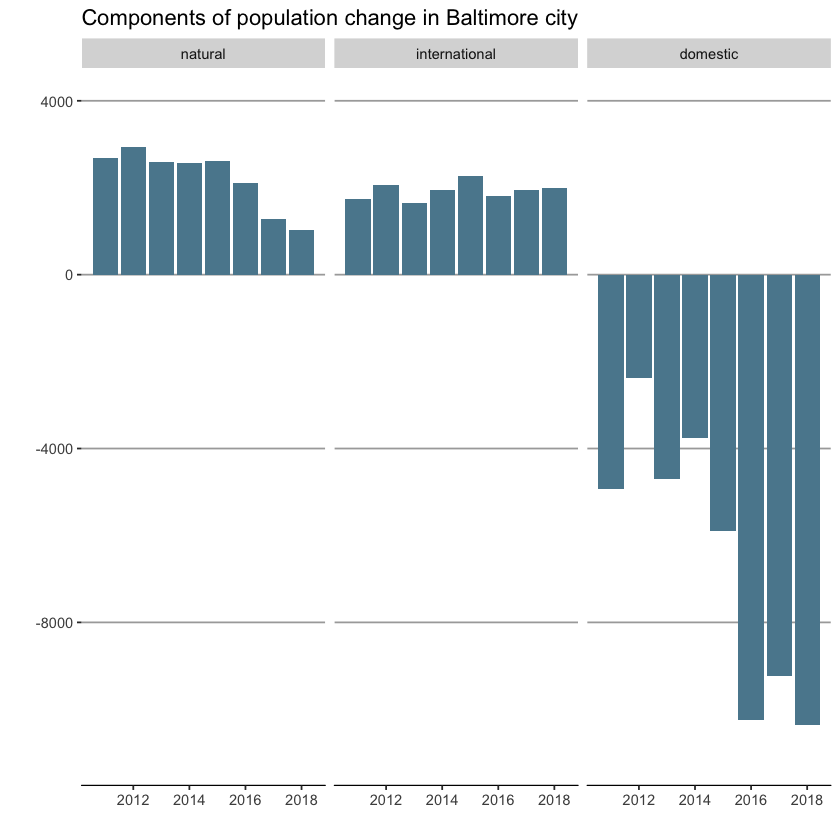

In [56]:
ggplot(components.18 %>% filter(county == '510')) + 
  geom_bar(aes(x = year.label, fill = component,
               y = value, group = county), 
           stat = 'identity') + 
  facet_wrap(~component.f) +
  labs(x = '', y = '') +
  scale_fill_manual(values = c( '#5B889D','#5B889D' ,'#5B889D')) +
  theme(panel.background = element_blank(), 
        plot.background = element_blank(),
        panel.grid.major.y =  element_line(color = 'darkgrey'),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        axis.line.x = element_line(),
        legend.position = 'none') + 
  scale_y_continuous(limits = c(-11000, 4000)) + ggtitle("Components of population change in Baltimore city")

### Finding: Over the 12-month period, domestic migration in Maryland was 24,518, international migration added 22,575 residents and the natural population increase was 19,845.

Filter `components.18` to Maryland.

In [58]:
components.18 %>% filter(county == '000' & year.label == 2018)

county,stname,ctyname,variable,value,year.label,component,component.f
000,Maryland,Maryland,naturalinc2018,19845,2018,natural,natural
000,Maryland,Maryland,internationalmig2018,22575,2018,international,international
000,Maryland,Maryland,domesticmig2018,-24518,2018,domestic,domestic


In [69]:
print(paste0("Between July 2017 and July 2018, Maryland's domestic migration change was ",
            components.18[components.18$county == '000' & 
                          components.18$year.label == 2018 & 
                          components.18$component == 'domestic', ]$value,
            ", international migration change was ",
            components.18[components.18$county == '000' & 
                          components.18$year.label == 2018 & 
                          components.18$component == 'international', ]$value, 
            ", and the natural increase in population was ",
            components.18[components.18$county == '000' & 
                          components.18$year.label == 2018 & 
                          components.18$component == 'natural', ]$value, "."))

[1] "Between July 2017 and July 2018, Maryland's domestic migration change was -24518, international migration change was 22575, and the natural increase in population was 19845."


### Finding: Since July 2010, Baltimore has lost more than 18,500 residents, or 3% of its population, while its neighbors have seen population gains.

Calculate numberic and percentage change in population since 2010 using the `pop.18` dataframe.

In [94]:
pop.18 <- pop.18 %>% mutate(chg_10 = value-lag(value, 8),
                  pcg_10 = (value/lag(value, 8) - 1) * 100) 

Filter to Baltimore City.

In [98]:
pop.18 %>% filter(county == '510' & year.label == 2018)

county,stname,ctyname,variable,value,year.label,chg,pcg,chg_10,pcg_10
510,Maryland,Baltimore city,popestimate2018,602495,2018,-7346,-1.204576,-18510,-2.980652


In [103]:
print(paste("Since July 2010, Baltimore has lost",
            pop.18[pop.18$county == '510' & 
                   pop.18$year.label == 2018, ]$chg_10,
            "residents, or",
            round(pop.18[pop.18$county == '510' & 
                   pop.18$year.label == 2018, ]$pcg_10, 2), 
            "% of its population."))

[1] "Since July 2010, Baltimore has lost -18510 residents, or -2.98 % of its population."


Filter to neighboring counties and select change since 2010. All are positive except for Baltimore City.

In [113]:
pop.18 %>% filter(year.label == 2018 & ( 
                  ctyname == 'Anne Arundel County' |
                  ctyname == 'Baltimore County' | 
                  ctyname == 'Carroll County' | 
                  ctyname == 'Harford County' | 
                  ctyname == 'Howard County' | 
                  ctyname == 'Baltimore city')) %>% select(ctyname, pcg_10)

Adding missing grouping variables: `county`


county,ctyname,pcg_10
003,Anne Arundel County,6.8154214
005,Baltimore County,2.7116396
013,Carroll County,0.7278186
025,Harford County,3.5561808
027,Howard County,11.9766620
510,Baltimore city,-2.9806523


### Finding: Between 2017 and 2018, all other counties in the Baltimore region experienced upticks in population, with the exception of Baltimore County, whose year-over-year numbers remained flat.

Filter to neighboring counties and select change since 2010. All are positive except for Baltimore City and Baltimore County whose numbers were basically flat.

In [115]:
pop.18 %>% filter(year.label == 2018 & ( 
                  ctyname == 'Anne Arundel County' |
                  ctyname == 'Baltimore County' | 
                  ctyname == 'Carroll County' | 
                  ctyname == 'Harford County' | 
                  ctyname == 'Howard County' | 
                  ctyname == 'Baltimore city')) %>% select(ctyname, pcg)

Adding missing grouping variables: `county`


county,ctyname,pcg
003,Anne Arundel County,0.77660289
005,Baltimore County,-0.02075783
013,Carroll County,0.48263930
025,Harford County,0.82019929
027,Howard County,1.19671608
510,Baltimore city,-1.20457627


### Finding: Population estimates showing a slight increase in Baltimore's population in 2006 were revised after the 2010 decennial census, turning a slight increase in population into a very small decline.

Use the postcensal estimates for 2000-2010, `postcensal`, to calculate changes in counties' population over that decade according to the numbers created at the time (i.e., not taking into account the results of the 2010 decennial census). Filter to Baltimore City and the year 2006.

In [118]:
md.postcensal %>% group_by(county) %>% arrange(year.label) %>% filter(grepl('popestimate', label)) %>% 
                    mutate(chg = tot.pop - lag(tot.pop),
                           pcg = (tot.pop/lag(tot.pop) - 1) * 100) %>% arrange(county, year.label) %>% 
filter(county == '510' & year.label == 2006)

stname,ctyname,county,label,tot.pop,year.label,chg,pcg
Maryland,Baltimore city,510,popestimate072006,640961,2006,897,0.1401422


Use the postcensal estimates for 2000-2010, `intercensal`, to calculate changes in counties' population over that decade according to the *revised* numbers calculated after taking into account the results of the 2010 decennial census. Filter to Baltimore City and the year 2006.

In [120]:
md.intercensal %>% group_by(county) %>% arrange(year.label) %>% filter(grepl('popestimate', label)) %>% 
                    mutate(chg = tot.pop - lag(tot.pop),
                           pcg = (tot.pop/lag(tot.pop) - 1) * 100) %>% arrange(county, year.label) %>% 
filter(county == '510' & year.label == 2006)

stname,ctyname,county,label,tot.pop,year.label,chg,pcg
Maryland,Baltimore city,510,popestimate2006,621109,2006,-451,-0.07255937


The previous estimated increase of 897 residents was revised to be a decline of 451 residents.